In [32]:
import graspologic

import numpy as np
%matplotlib inline


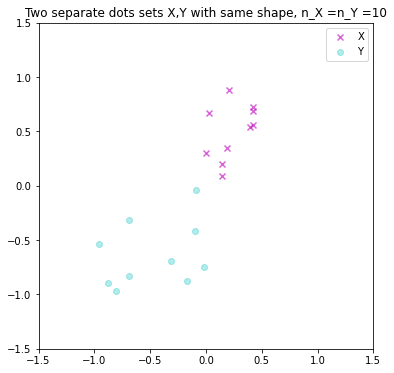

In [33]:
import matplotlib.pyplot as plt

# Now we import an random array of (10,2) as the coordinates of 10 points in X
# For rotation, introduce another random array of (10,2) as the coordinates of 10 points in Z
# Rotate Z in n degree to get Y
np.random.seed(1)
X = np.random.rand(10,2)
Y = Z = np.random.rand(10,2)

i = 0
n = 3.14
while i <= 9:
    a_Z= Z[i,0]
    b_Z = Z[i,1]
    c = (a_Z**2 + b_Z**2)**0.5
    n_Z = np.arctan(b_Z/a_Z)
    a_Y = c* np.cos(n + n_Z) 
    b_Y = c* np.sin(n + n_Z)
    Y[i] = ([a_Y, b_Y])
    i = i+1

np.random.seed(1)
X = np.random.rand(10,2)

# Here we got two different dot sets X, Y, being away from each other
# Plot X, Y
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Two separate dots sets X,Y with same shape, n_X =n_Y =10")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

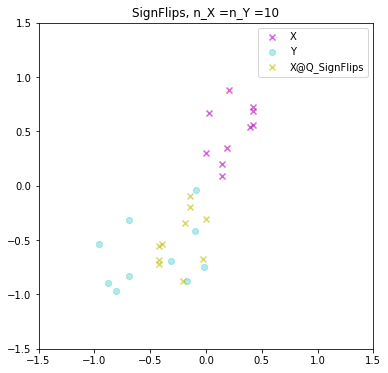

In [34]:
# Use SignFlips to get a Q that could align X with Y.
# X@Q_SignFlips is the output of rotated X by SignFlips.
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips, n_X =n_Y =10")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.6, color='y', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [35]:
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
print(norm_SignFlips)

1.9504210452514381


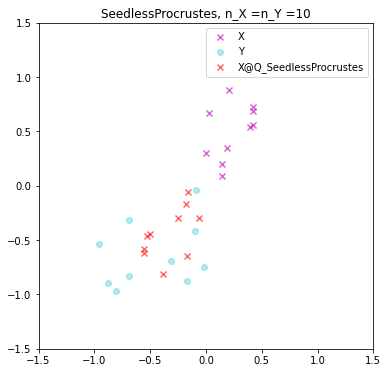

In [36]:
# Use SeedlessProcrustes to get a Q that could align X with Y.
# X@Q_SeedlessProcrustes is the output of rotated X by SeedlessProcrustes.

from graspologic.align import SeedlessProcrustes

X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, n_X =n_Y =10")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [37]:
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
print(norm_Seedless)

1.8892409592844122


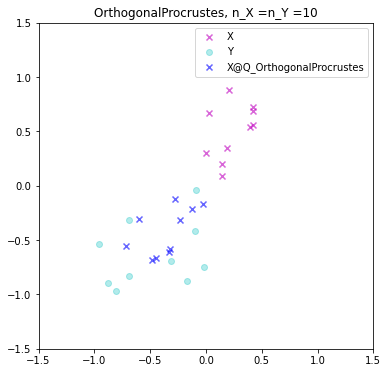

In [38]:
# Use OrthogonalProcrustes to get a Q that could align X with Y.
# X@Q_OrthogonalProcrustes is the output of rotated X by OrthogonalProcrustes.

from graspologic.align import OrthogonalProcrustes

X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes, n_X =n_Y =10")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [39]:
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
print(norm_Orthogonal)

1.6415215130890894


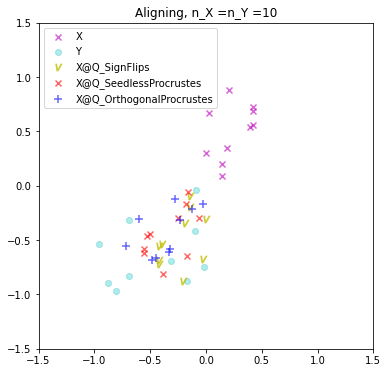

In [40]:
# Plot all the ratation by Aligning for comparison.
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Aligning, n_X =n_Y =10")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.6, color='y', marker='$V$', s=50)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='+', s=50)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [41]:
#Here, we introduce linlg.norm in numpy to calculate 
#the Frobenius norm of X_prime - Y, for comparing
#the aligning ability of diffrent fucntions in this example
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
print(norm_SignFlips)
print(norm_Seedless)
print(norm_Orthogonal)

1.9504210452514381
1.8892409592844122
1.6415215130890894


In [42]:
# We can see that when X,Y are two dot sets with different dots distribution 
# but the same amount of dots, X_prime was put in different place in the graph.
# As comparing the norms of each function, in this case, OrthogonalProcrustes 
# still works the best for aligning X with Y, but SeedlessProcrustes seem to place
# X_prime to a more "center place of Y".

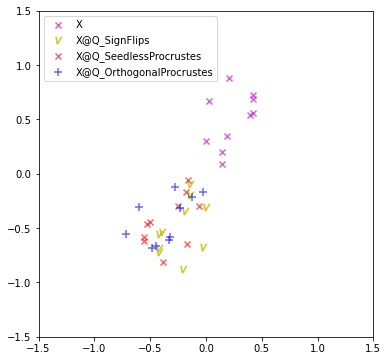

In [43]:
# Plot all the ratation by Aligning for comparison.(Without Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.6, color='y', marker='$V$', s=50)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='+', s=50)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

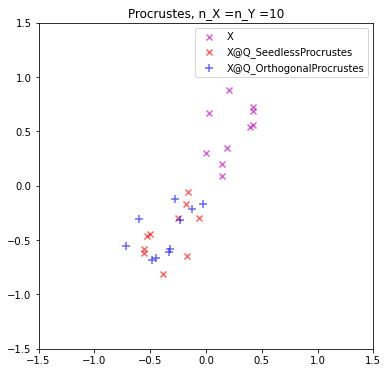

In [44]:
# Plot all the Procrustes outcomes
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Procrustes, n_X =n_Y =10")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='+', s=50)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();